# BIRCH Clustering
# Checking the Python Environment

This is to ensure that the correct Python environment is set up correctly and used

In [1]:
import sys
import IPython

# Change path to append here
sys.path.append(r'C:\Users\hp\Downloads\Machine Learning Assignment')

print("Python executable:", sys.executable)
print("Python version:", sys.version)
print("Kernel:", IPython.get_ipython().kernel)
print("Sys paths:", sys.path)

Python executable: C:\Users\hp\anaconda3\envs\machine_learning_assignment\python.exe
Python version: 3.11.9 | packaged by Anaconda, Inc. | (main, Apr 19 2024, 16:40:41) [MSC v.1916 64 bit (AMD64)]
Kernel: <ipykernel.ipkernel.IPythonKernel object at 0x000002F42C3C5010>
Sys paths: ['C:\\Users\\hp\\Documents\\Machine_Learning_Assignment\\testing', 'C:\\Users\\hp\\Documents\\Machine_Learning_Assignment', 'C:\\Users\\hp\\anaconda3\\envs\\machine_learning_assignment\\python311.zip', 'C:\\Users\\hp\\anaconda3\\envs\\machine_learning_assignment\\DLLs', 'C:\\Users\\hp\\anaconda3\\envs\\machine_learning_assignment\\Lib', 'C:\\Users\\hp\\anaconda3\\envs\\machine_learning_assignment', '', 'C:\\Users\\hp\\anaconda3\\envs\\machine_learning_assignment\\Lib\\site-packages', 'C:\\Users\\hp\\anaconda3\\envs\\machine_learning_assignment\\Lib\\site-packages\\win32', 'C:\\Users\\hp\\anaconda3\\envs\\machine_learning_assignment\\Lib\\site-packages\\win32\\lib', 'C:\\Users\\hp\\anaconda3\\envs\\machine_learn

# Importing Libraries

This is to ensure that the necessary libraries are imported and used

In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import Birch
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Loading the Dataset

Following shows the raw dataset that is loaded into the notebook

In [3]:
df_scaled = pd.read_csv(r'../raw_data/customer_standard_scaled.csv', index_col = 'CUST_ID')
df_pca = pd.read_csv(r'../raw_data/customer_pca_5.csv', index_col = 'CUST_ID')
df_tsne = pd.read_csv(r'../raw_data/customer_tsne_3.csv', index_col = 'CUST_ID')
df_umap = pd.read_csv(r'../raw_data/customer_umap_3.csv', index_col = 'CUST_ID')

# 1.0 Model Tranining

Four datasets will be experimented with the BIRCH clustering algorithm:
   1. Scaled dataset
2. PCA dataset
3. t-SNE dataset
4. UMAP dataset

In [9]:
def birch_clustering(df, threshold = 0.5, branching_factor = 50, n_clusters = 3):
    birch_model = Birch(threshold=threshold, branching_factor=branching_factor, n_clusters=n_clusters)
    clustering_labels = birch_model.fit_predict(df)
    
    return clustering_labels

# Function to visualise the clusters
def visualise_clusters(df, df_name, cluster_labels):
    # Visualising the clusters
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plotting the 3D scatter plot
    plot = ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=cluster_labels, cmap='viridis', s=5)

    plt.colorbar(plot).set_label('Cluster')

    # Adding labels and title
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')
    ax.set_title('3D BIRCH Clustering: ' + df_name)

    plt.show()

## 1.1 Scaled Dataset

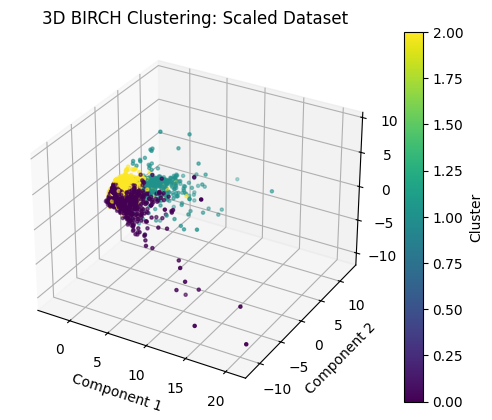

Number of clusters:  3


In [11]:
# Clustering the dataset
scaled_cluster_labels = birch_clustering(df_scaled)

# Visualising the clusters
visualise_clusters(df_pca, 'Scaled Dataset', scaled_cluster_labels)

# Printing number of clusters
print('Number of clusters: ', len(np.unique(scaled_cluster_labels)))

## 1.2 PCA Dataset

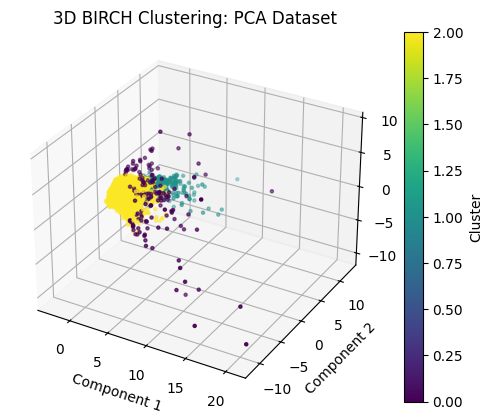

Number of clusters:  3


In [12]:
# Clustering the dataset
pca_cluster_labels = birch_clustering(df_pca)

# Visualising the clusters
visualise_clusters(df_pca, 'PCA Dataset', pca_cluster_labels)

# Printing number of clusters
print('Number of clusters: ', len(np.unique(pca_cluster_labels)))

## 1.3 t-SNE Dataset

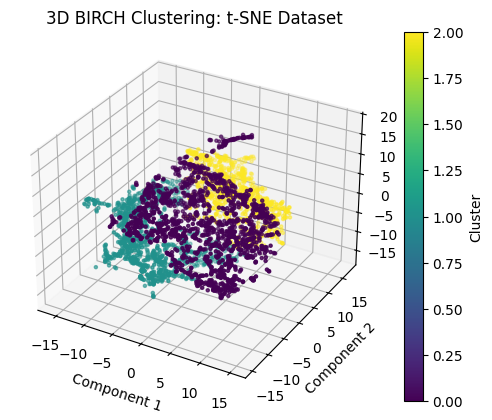

Number of clusters:  3


In [13]:
# Clustering the dataset
tsne_cluster_labels = birch_clustering(df_tsne)

# Visualising the clusters
visualise_clusters(df_tsne, 't-SNE Dataset', tsne_cluster_labels)

# Printing number of clusters
print('Number of clusters: ', len(np.unique(tsne_cluster_labels)))

## 1.4 UMAP Dataset

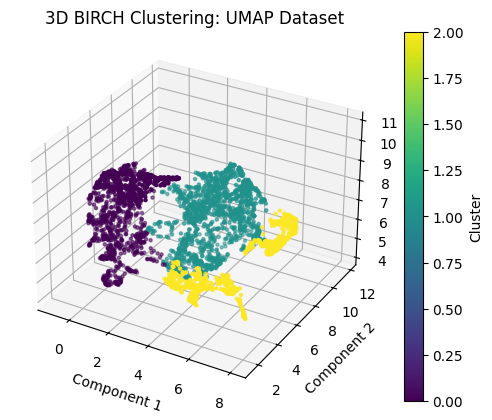

Number of clusters:  3


In [14]:
# Clustering the dataset
umap_cluster_labels = birch_clustering(df_umap)

# Visualising the clusters
visualise_clusters(df_umap, 'UMAP Dataset', umap_cluster_labels)

# Printing number of clusters
print('Number of clusters: ', len(np.unique(umap_cluster_labels)))

## 2.0 Model Evaluation

Three(3) evaluation metrics will be applied:
1. Silhouette Score
2. Davies-Bouldin Index
3. Calinski-Harabasz Score

References: 
1. https://www.geeksforgeeks.org/clustering-metrics/
2. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
3. https://medium.com/@hazallgultekin/what-is-silhouette-score-f428fb39bf9a 
4. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html
5. https://www.geeksforgeeks.org/davies-bouldin-index/
6. https://medium.com/@haataa/how-to-measure-clustering-performances-when-there-are-no-ground-truth-db027e9a871c
7. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html

In [23]:
# Function to visualise the differences in evaluation metric scores for different datasets
def visualise_scores(scores, metric_name):
    scores = scores
    datasets = ['Scaled', 'PCA', 't-SNE', 'UMAP']
    fig, ax = plt.subplots()
    bars = ax.bar(datasets, scores, width=0.35, label=metric_name, color=['firebrick', 'orange', 'lightblue', 'darkgreen'])

    # Annotate the scores
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=6)
    
    ax.set_xlabel('Datasets')
    ax.set_ylabel('Scores')
    ax.set_title('BIRCH: ' + metric_name)
    plt.show()

## 2.1 Silhouette Score

This metric is measured by calculating the similarity of each data points within the cluster and the dissimilarity of the data points in other clusters.

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

where $a(i)$ is the average distance of point $i$ to all other points in the same cluster and $b(i)$ is the average distance of point $i$ to all other points in the nearest cluster.

__Interpretation__: It ranges from -1 (poor clustering) to +1 (perfect clustering). A score close to 1 suggests well-separated clusters.

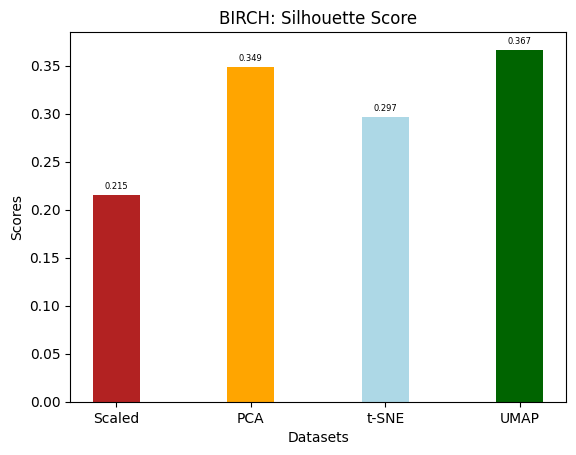

In [24]:
# Calculating the Silhouette Score
silhouette_scaled = silhouette_score(df_scaled, scaled_cluster_labels)
silhouette_pca = silhouette_score(df_pca, pca_cluster_labels)
silhouette_tsne = silhouette_score(df_tsne, tsne_cluster_labels)
silhouette_umap = silhouette_score(df_umap, umap_cluster_labels)
silhouette_score_lists = [silhouette_scaled, silhouette_pca, silhouette_tsne, silhouette_umap]

# Visualising the Silhouette Scores
visualise_scores(silhouette_score_lists, 'Silhouette Score')

## 2.2 Davies-Bouldin Index

The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances.

$$
DB = \frac{1}{n} \sum_{i=1}^{n} \max_{i \neq j} \left( \frac{\sigma_i + \sigma_j}{d_{ij}} \right)
$$

where $\sigma_i$ is the average distance of all the points in cluster $i$ to the centroid of the cluster, $d_{ij}$ is the distance between the centroids of cluster $i$ and $j$.

__Interpretation__: The minimum value of the Davies-Bouldin index is zero, which indicates the best clustering.

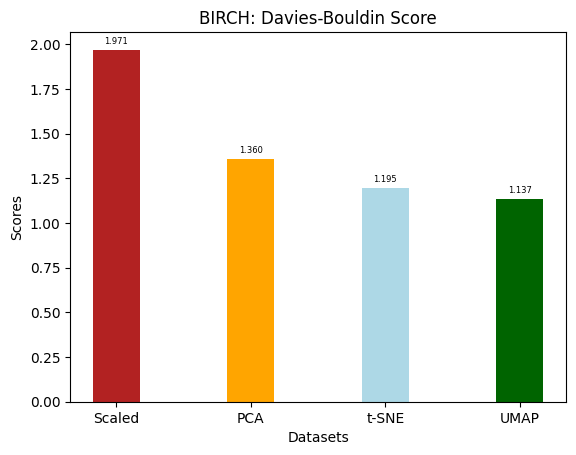

In [25]:
# Calculating the Davies-Bouldin Index
db_scaled = davies_bouldin_score(df_scaled, scaled_cluster_labels)
db_pca = davies_bouldin_score(df_pca, pca_cluster_labels)
db_tsne = davies_bouldin_score(df_tsne, tsne_cluster_labels)
db_umap = davies_bouldin_score(df_umap, umap_cluster_labels)
db_score_lists = [db_scaled, db_pca, db_tsne, db_umap]

# Visualising the Davies-Bouldin Index
visualise_scores(db_score_lists, 'Davies-Bouldin Score')

## 2.3 Calinski-Harabasz Score

The score is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters.

$$
CH = \frac{\text{Tr}(B_k)}{\text{Tr}(W_k)} \cdot \frac{n - k}{k - 1}
$$

where $B_k$ is the between-cluster dispersion matrix, $W_k$ is the within-cluster dispersion matrix, $n$ is the number of samples, and $k$ is the number of clusters.

__Interpretation__: Higher score indicates better defined clusters.

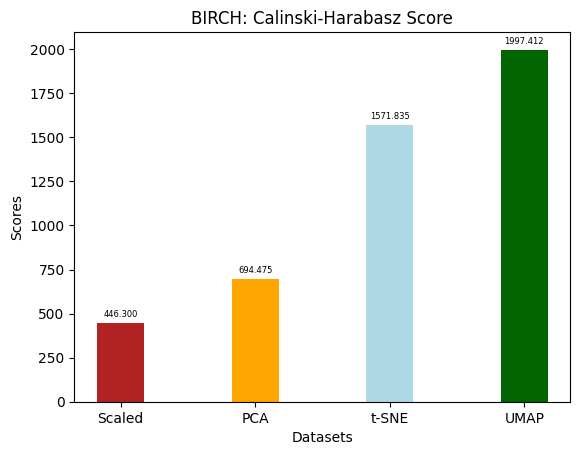

In [26]:
# Calculating the Calinski-Harabasz Score
ch_scaled = calinski_harabasz_score(df_scaled, scaled_cluster_labels)
ch_pca = calinski_harabasz_score(df_pca, pca_cluster_labels)
ch_tsne = calinski_harabasz_score(df_tsne, tsne_cluster_labels)
ch_umap = calinski_harabasz_score(df_umap, umap_cluster_labels)
ch_score_lists = [ch_scaled, ch_pca, ch_tsne, ch_umap]

# Visualising the Calinski-Harabasz Score
visualise_scores(ch_score_lists, 'Calinski-Harabasz Score')

# 3.0 Hyperparameter Tuning

The key parameters of the BIRCH algorithm are:
1. Threshold: The maximum radius of the subcluster obtained by merging a new sample and the closest subcluster. Smaller thresold means more subclusters and vice versa.
2. Branching Factor: The maximum number of CF subclusters in each node. Small branching factor means deeper tree and vice versa.
3. Number of Clusters: The number of clusters to form. (In sklearn, agglomorative clustering is used to extract the clusters)

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html 

In [28]:
# Setting up the hyperparameters
thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]
branching_factors = [10, 20, 30, 40, 50]
n_clusters = [2, 3, 4, 5, 6]

# Datasets
datasets = [df_scaled, df_pca, df_tsne, df_umap]

In [54]:
# Function to visualise tuned scores
def visualise_tuned_scores(df, metric_name, tuned_hyperparameters):
    # Set positions and width for the bars
    x = np.arange(len(df.index))
    width = 0.15

    # Create subplots for the grouped bar chart
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot each hyperparameter value as a separate set of bars within each group
    for i, value in enumerate(df.columns):
        bars = ax.bar(x + i * width, df.iloc[:, i], width, label=f'{tuned_hyperparameters} : {value}')
        
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.3f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=6)

    # Add labels, title, and custom x-axis tick labels
    ax.set_xlabel('Dataset')
    ax.set_ylabel(metric_name)
    ax.set_title(f'{metric_name} by Dataset for Different {tuned_hyperparameters}')
    ax.set_xticks(x + width * (len(df.columns) / 2 - 0.5))
    ax.set_xticklabels(df.index)
    ax.legend()

    # Display the plot
    plt.show()

## 3.1 Thresholds

In [34]:
# Tuning thresholds
silhouette_thresholds_tuned = []
db_threshold_tuned = []
ch_threshold_tuned = []

for threshold in thresholds:
    silhouette_scores_per_threshold = [threshold]
    db_scores_per_threshold = [threshold]
    ch_scores_per_threshold = [threshold]
    
    for dataset in datasets:
        cluster_labels = birch_clustering(dataset, threshold=threshold)
        silhouette = silhouette_score(dataset, cluster_labels)
        db = davies_bouldin_score(dataset, cluster_labels)
        ch = calinski_harabasz_score(dataset, cluster_labels)
        silhouette_scores_per_threshold.append(silhouette)
        db_scores_per_threshold.append(db)
        ch_scores_per_threshold.append(ch)
    
    silhouette_thresholds_tuned.append(silhouette_scores_per_threshold)
    db_threshold_tuned.append(db_scores_per_threshold)
    ch_threshold_tuned.append(ch_scores_per_threshold)

In [35]:
# Convert to DataFrame
thresholds_tuned_column_names = ['Threshold', 'Scaled', 'PCA', 't-SNE', 'UMAP']
silhouette_thresholds_tuned_df = pd.DataFrame(silhouette_thresholds_tuned, columns=thresholds_tuned_column_names).set_index('Threshold').T
db_thresholds_tuned_df = pd.DataFrame(db_threshold_tuned, columns=thresholds_tuned_column_names).set_index('Threshold').T
ch_thresholds_tuned_df = pd.DataFrame(ch_threshold_tuned, columns=thresholds_tuned_column_names).set_index('Threshold').T

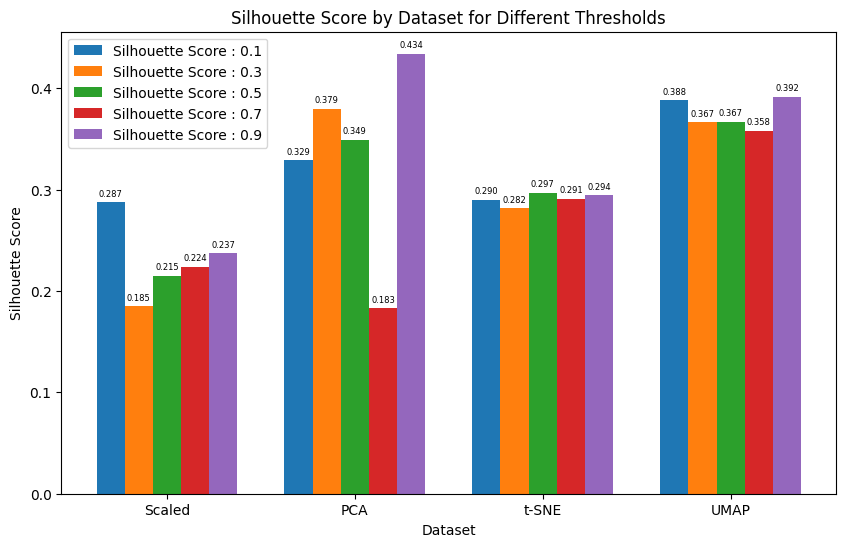

In [38]:
# Visualising the Silhouette Scores for Tuned Thresholds
visualise_tuned_scores(silhouette_thresholds_tuned_df, 'Silhouette Score', 'Thresholds')

__Insight__: On average, the Silhouette Score is highest for each dataset with a threshold of __0.9__. (expect for the scaled dataset)

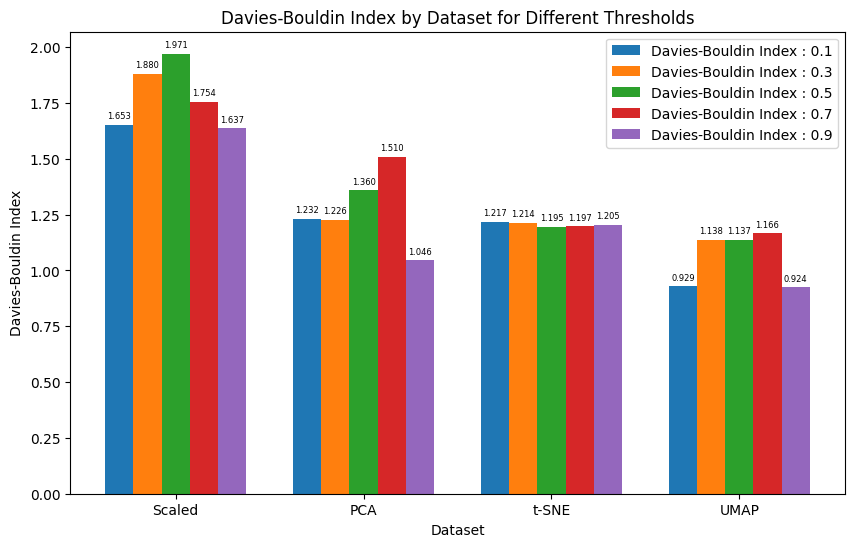

In [39]:
# Visualising the Davies-Bouldin Index for Tuned Thresholds
visualise_tuned_scores(db_thresholds_tuned_df, 'Davies-Bouldin Index', 'Thresholds')

__Insight__: On average, the Davies-Bouldin Index is lowest for each dataset with a threshold of __0.9__. 

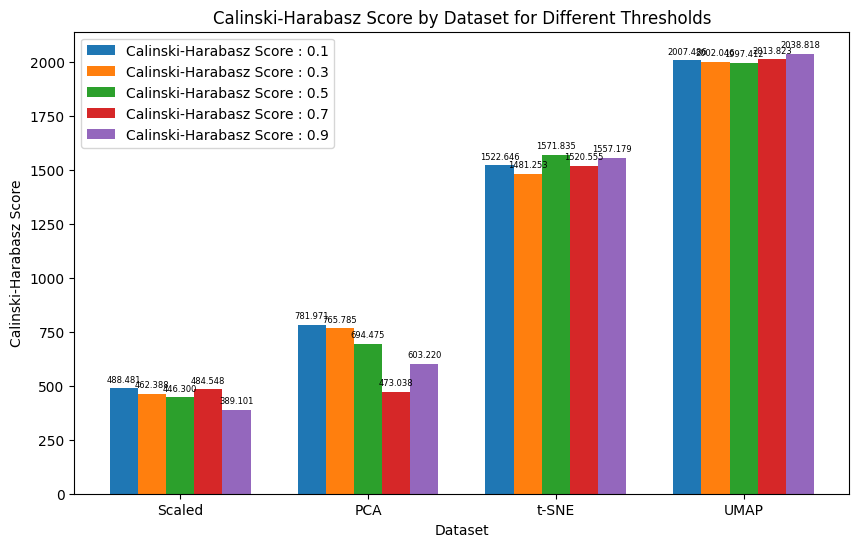

In [40]:
# Visualising the Calinski-Harabasz Score for Tuned Thresholds
visualise_tuned_scores(ch_thresholds_tuned_df, 'Calinski-Harabasz Score', 'Thresholds')

__Insight__: The Calinski-Harabasz Score is highest for Scaled and PCA with a threshold of __0.1__; However for t-SNE and UMAP, the score is highest with a threshold of __0.9__.

__Summary__: Threshold of __0.1__ and __0.9__ will be considered in tuning the following hyperparameters.

## 3.2 Branching Factor

In [44]:
# Tuning branching factors with threshold of 0.1
silhouette_bf_1_tuned = []
db_bf_1_tuned = []
ch_bf_1_tuned = []

for factor in branching_factors:
    silhouette_scores_per_bf = [factor]
    db_scores_per_bf = [factor]
    ch_scores_per_bf = [factor]

    for dataset in datasets:
        cluster_labels = birch_clustering(dataset, threshold=0.1, branching_factor=factor)
        silhouette = silhouette_score(dataset, cluster_labels)
        db = davies_bouldin_score(dataset, cluster_labels)
        ch = calinski_harabasz_score(dataset, cluster_labels)
        silhouette_scores_per_bf.append(silhouette)
        db_scores_per_bf.append(db)
        ch_scores_per_bf.append(ch)

    silhouette_bf_1_tuned.append(silhouette_scores_per_bf)
    db_bf_1_tuned.append(db_scores_per_bf)
    ch_bf_1_tuned.append(ch_scores_per_bf)

# Tuning branching factors with threshold of 0.9
silhouette_bf_2_tuned = []
db_bf_2_tuned = []
ch_bf_2_tuned = []

for factor in branching_factors:
    silhouette_scores_per_bf = [factor]
    db_scores_per_bf = [factor]
    ch_scores_per_bf = [factor]

    for dataset in datasets:
        cluster_labels = birch_clustering(dataset, threshold=0.9, branching_factor=factor)
        silhouette = silhouette_score(dataset, cluster_labels)
        db = davies_bouldin_score(dataset, cluster_labels)
        ch = calinski_harabasz_score(dataset, cluster_labels)
        silhouette_scores_per_bf.append(silhouette)
        db_scores_per_bf.append(db)
        ch_scores_per_bf.append(ch)

    silhouette_bf_2_tuned.append(silhouette_scores_per_bf)
    db_bf_2_tuned.append(db_scores_per_bf)
    ch_bf_2_tuned.append(ch_scores_per_bf)

In [46]:
# Convert to DataFrame
bf_tuned_column_names = ['BranchingFactor', 'Scaled', 'PCA', 't-SNE', 'UMAP']

silhouette_bf_1_tuned_df = pd.DataFrame(silhouette_bf_1_tuned, columns=bf_tuned_column_names).set_index('BranchingFactor').T
db_bf_1_tuned_df = pd.DataFrame(db_bf_1_tuned, columns=bf_tuned_column_names).set_index('BranchingFactor').T
ch_bf_1_tuned_df = pd.DataFrame(ch_bf_1_tuned, columns=bf_tuned_column_names).set_index('BranchingFactor').T

silhouette_bf_2_tuned_df = pd.DataFrame(silhouette_bf_2_tuned, columns=bf_tuned_column_names).set_index('BranchingFactor').T
db_bf_2_tuned_df = pd.DataFrame(db_bf_2_tuned, columns=bf_tuned_column_names).set_index('BranchingFactor').T
ch_bf_2_tuned_df = pd.DataFrame(ch_bf_2_tuned, columns=bf_tuned_column_names).set_index('BranchingFactor').T

Threshold: 0.1


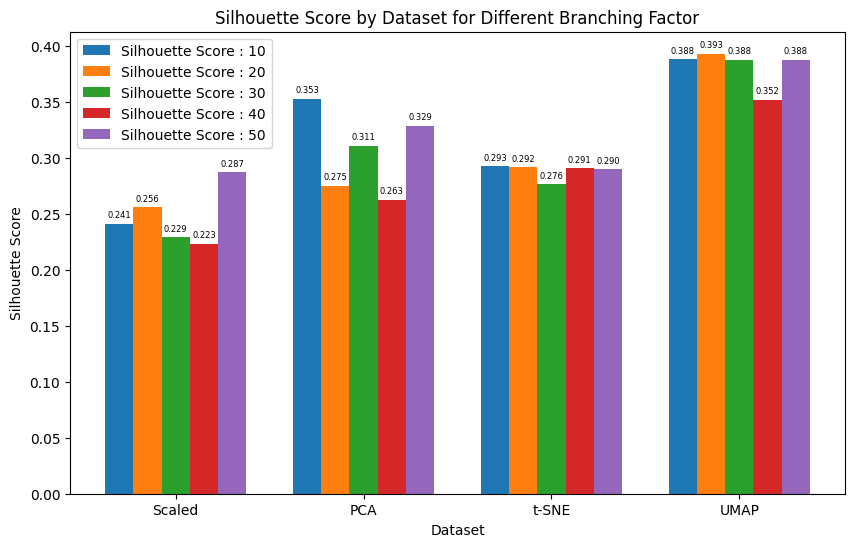

Threshold: 0.9


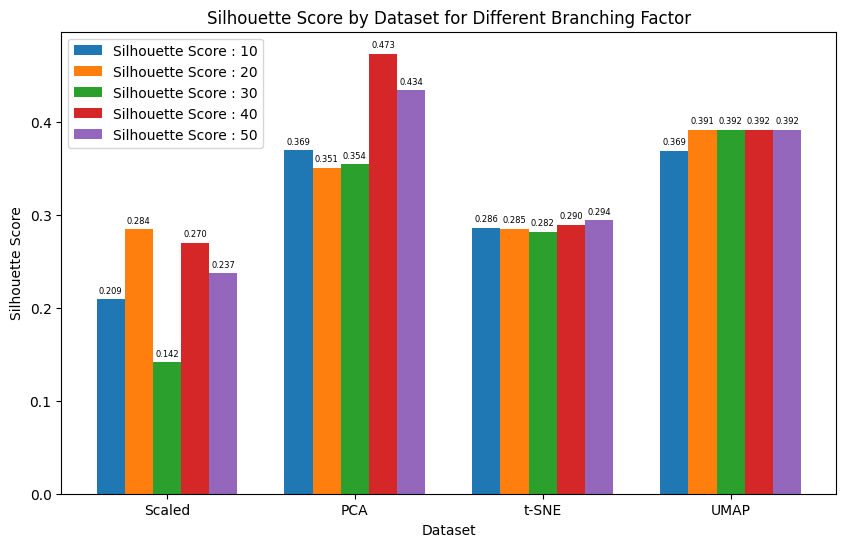

In [48]:
# Visualising the Silhouette Scores for Tuned Branching Factors 
print("Threshold: 0.1")
visualise_tuned_scores(silhouette_bf_1_tuned_df, 'Silhouette Score', 'Branching Factor')
print("Threshold: 0.9")
visualise_tuned_scores(silhouette_bf_2_tuned_df, 'Silhouette Score', 'Branching Factor')

__Insight__:
1. For threshold of __0.1__, the Silhouette Score is highest for each dataset with a different branching factors. Among all, __UMAP__ dataset gain the highest score with a branching factor of __20__.
2. For threshold of __0.9__, the Silhouette Score is highest for Scaled and PCA datasets with a different branching factors. However, __t-SNE__ and __UMAP__ datasets gain the highest score with a branching factor of __50__.

Threshold: 0.1


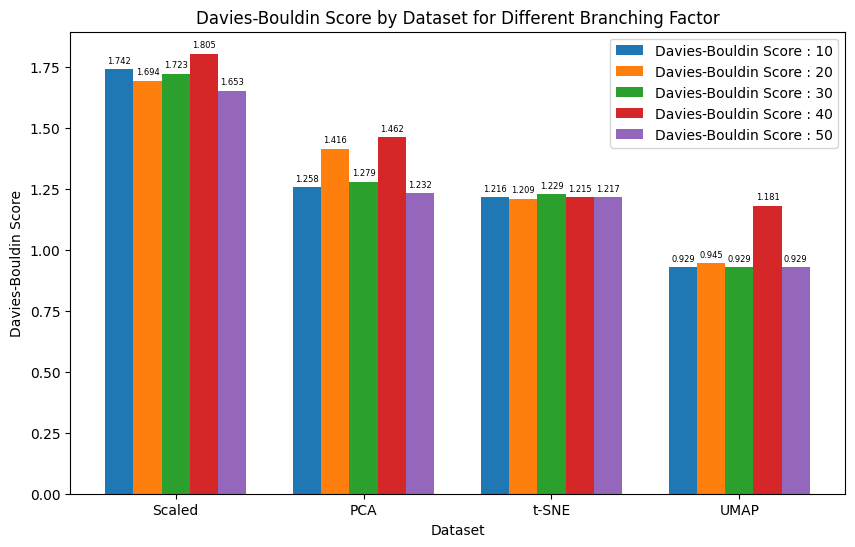

Threshold: 0.9


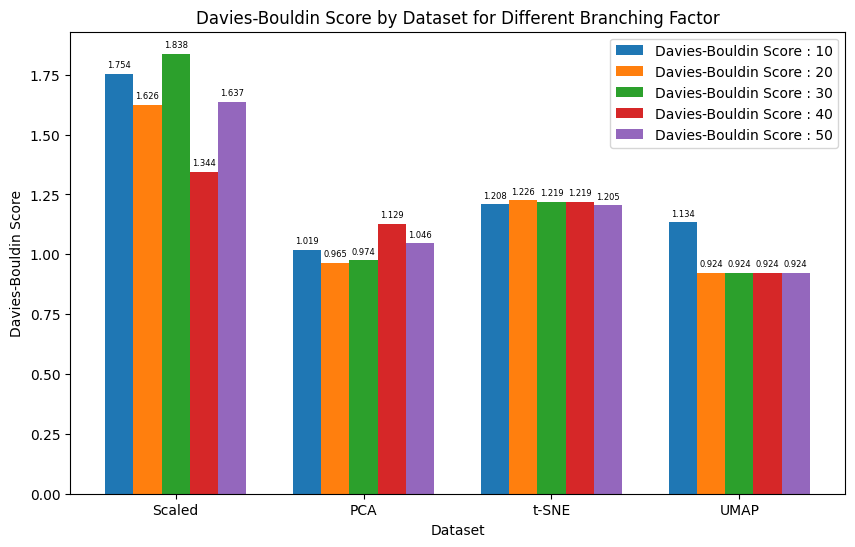

In [49]:
# Visualising the Davies-Bouldin Scores for Tuned Branching Factors 
print("Threshold: 0.1")
visualise_tuned_scores(db_bf_1_tuned_df, 'Davies-Bouldin Score', 'Branching Factor')
print("Threshold: 0.9")
visualise_tuned_scores(db_bf_2_tuned_df, 'Davies-Bouldin Score', 'Branching Factor')

__Insight__:
1. For threshold of __0.1__, the Davies-Bouldin Index is lowest for each dataset with __50__ branching factors in general.
2. For threshold of __0.9__, the Davies-Bouldin Index is lowest for Scaled and PCA datasets with a different branching factors. However, __t-SNE__ and __UMAP__ datasets gain the lowest score with a branching factor of __50__.

Threshold: 0.1


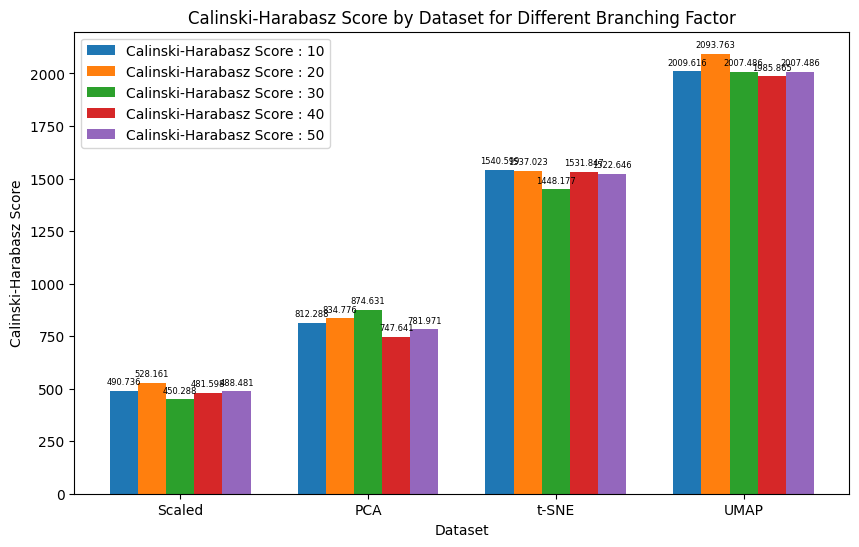

Threshold: 0.9


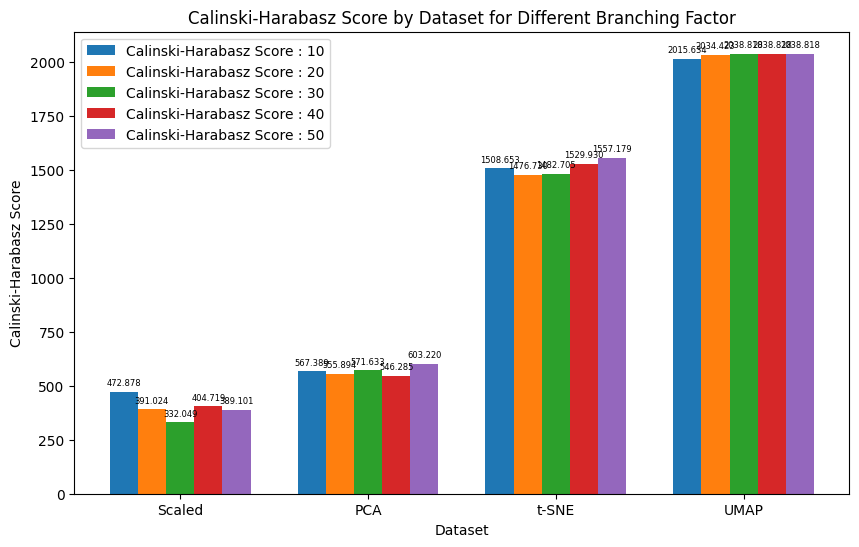

In [50]:
# Visualising the Calinski-Harabasz Scores for Tuned Branching Factors 
print("Threshold: 0.1")
visualise_tuned_scores(ch_bf_1_tuned_df, 'Calinski-Harabasz Score', 'Branching Factor')
print("Threshold: 0.9")
visualise_tuned_scores(ch_bf_2_tuned_df, 'Calinski-Harabasz Score', 'Branching Factor')

__Insight__:
1. For threshold of __0.1__, the Calinski-Harabasz Score is highest for each dataset with a different branching factors. Among all, __UMAP__ dataset gain the highest score with a branching factor of __20__.
2. For threshold of __0.9__, the Calinski-Harabasz Score is highest for each dataset with a branching factor of __50__.

__Summary__: It seems like using __threshold of 0.9__ and __branching factor of 50__ yield the most stable increment in performance gain. Hence, the following hyperparameters will be tuned with this settings.

## 3.3 Number of Clusters

In [51]:
# Tuning thresholds
silhouette_cluster_num_tuned = []
db_cluster_num_tuned = []
ch_cluster_num_tuned = []

for number in n_clusters:
    silhouette_scores_per_cluster_num = [number]
    db_scores_per_cluster_num = [number]
    ch_scores_per_cluster_num = [number]

    for dataset in datasets:
        cluster_labels = birch_clustering(dataset, threshold=0.9, branching_factor=50, n_clusters=number)
        silhouette = silhouette_score(dataset, cluster_labels)
        db = davies_bouldin_score(dataset, cluster_labels)
        ch = calinski_harabasz_score(dataset, cluster_labels)
        silhouette_scores_per_cluster_num.append(silhouette)
        db_scores_per_cluster_num.append(db)
        ch_scores_per_cluster_num.append(ch)

    silhouette_cluster_num_tuned.append(silhouette_scores_per_cluster_num)
    db_cluster_num_tuned.append(db_scores_per_cluster_num)
    ch_cluster_num_tuned.append(ch_scores_per_cluster_num)

In [52]:
# Convert to DataFrame
cluster_num_tuned_column_names = ['ClusterNum', 'Scaled', 'PCA', 't-SNE', 'UMAP']
silhouette_cluster_num_tuned_df = pd.DataFrame(silhouette_cluster_num_tuned, columns=cluster_num_tuned_column_names).set_index('ClusterNum').T
db_cluster_num_tuned_df = pd.DataFrame(db_cluster_num_tuned, columns=cluster_num_tuned_column_names).set_index('ClusterNum').T
ch_cluster_num_tuned_df = pd.DataFrame(ch_cluster_num_tuned, columns=cluster_num_tuned_column_names).set_index('ClusterNum').T

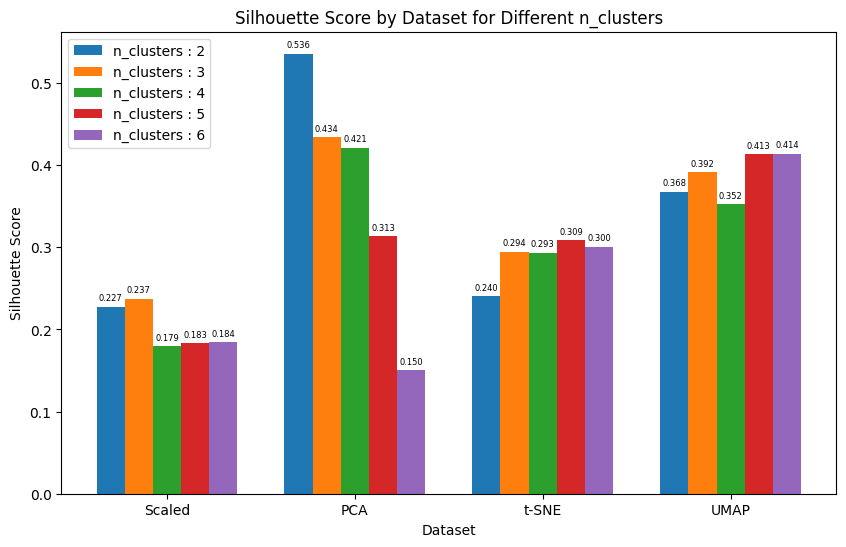

In [55]:
# Visualising the Silhouette Scores for Tuned Thresholds
visualise_tuned_scores(silhouette_cluster_num_tuned_df, 'Silhouette Score', 'n_clusters')

__Insight__: The Silhouette Score is highest for each dataset with a different number of clusters. However, __t-sne__ and __UMAP__ datasets gain the highest score with __5__ clusters.

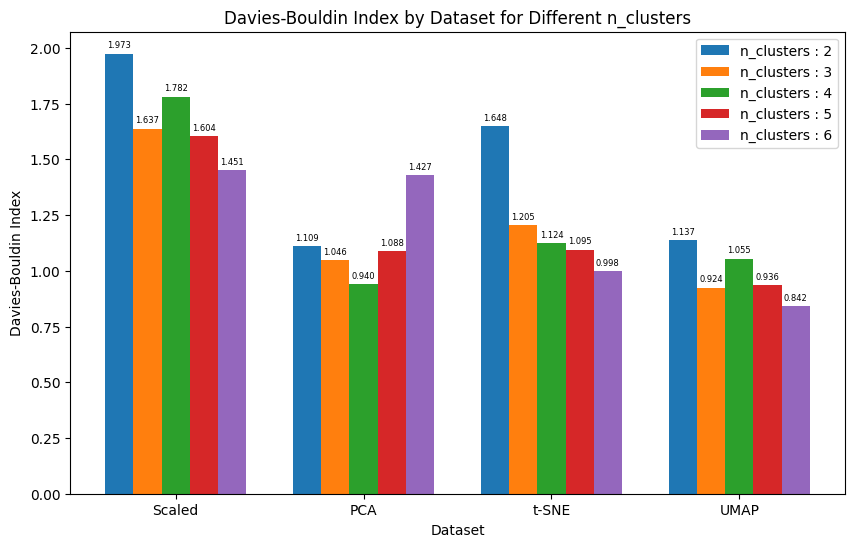

In [56]:
# Visualising the Davies-Bouldin Index for Tuned Thresholds
visualise_tuned_scores(db_cluster_num_tuned_df, 'Davies-Bouldin Index', 'n_clusters')

__Insight__: On average, the Davies-Bouldin Index is lowest for each dataset with __6__ clusters.

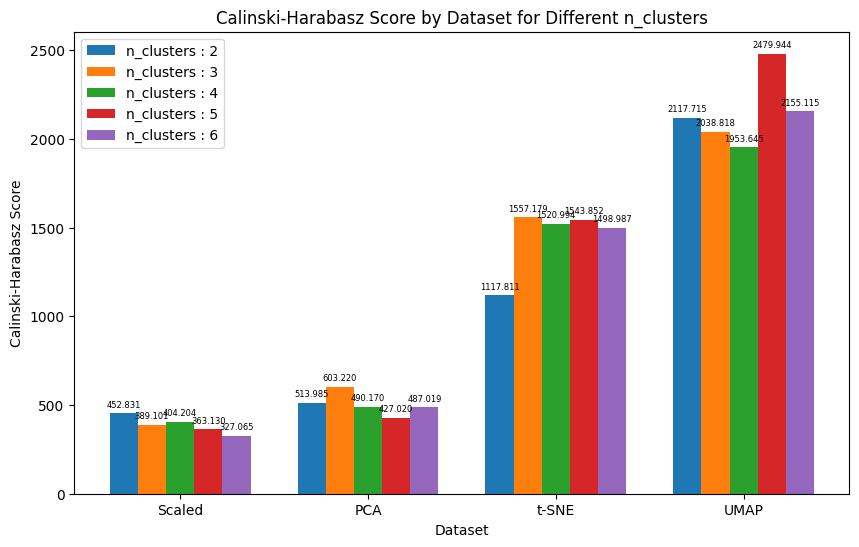

In [57]:
# Visualising the Calinski-Harabasz Score for Tuned Thresholds
visualise_tuned_scores(ch_cluster_num_tuned_df, 'Calinski-Harabasz Score', 'n_clusters')

__Insight__: The Calinski-Harabasz Score is highest for each dataset with a different number of clusters. However, __t-sne__ and __UMAP__ datasets gain the highest score with __5__ clusters.

# 4.0 Conclusion

Generally, the BIRCH clustering algorithm performs well with the following hyperparameters:
1. Threshold: 0.9
2. Branching Factor: 50
3. Number of Clusters: 5

The following will visualise the clustering results for each dataset with the tuned hyperparameters.

## 4.1 Scaled Dataset

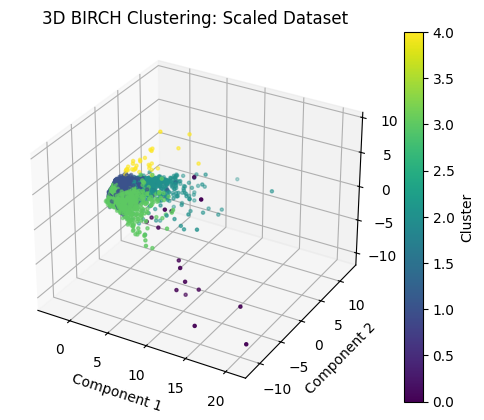

Number of clusters:  5
Silhouette Score: 0.18336562961133612
Davies-Bouldin Index: 1.6038404519810558
Calinski-Harabasz Score: 363.130042332471


In [59]:
# Clustering the dataset
scaled_tuned_cluster_labels = birch_clustering(df_scaled, threshold=0.9, branching_factor=50, n_clusters=5)

# Visualising the clusters
visualise_clusters(df_pca, 'Scaled Dataset', scaled_tuned_cluster_labels)

# Printing number of clusters
print('Number of clusters: ', len(np.unique(scaled_tuned_cluster_labels)))

# Calculating the Silhouette Score, Davies-Bouldin Index, and Calinski-Harabasz Score
silhouette_scaled_tuned = silhouette_score(df_scaled, scaled_tuned_cluster_labels)
db_scaled_tuned = davies_bouldin_score(df_scaled, scaled_tuned_cluster_labels)
ch_scaled_tuned = calinski_harabasz_score(df_scaled, scaled_tuned_cluster_labels)

# Printing the scores
print('Silhouette Score:', silhouette_scaled_tuned)
print('Davies-Bouldin Index:', db_scaled_tuned)
print('Calinski-Harabasz Score:', ch_scaled_tuned)

## 4.2 PCA Dataset

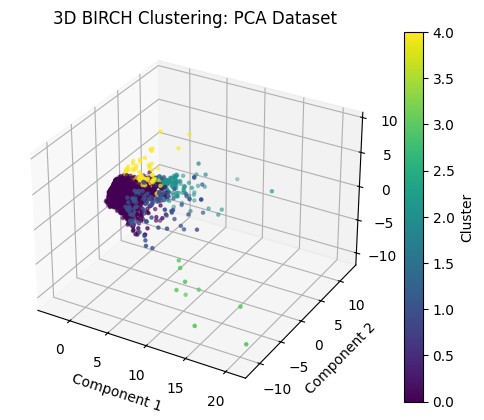

Number of clusters:  5
Silhouette Score: 0.31336576549266987
Davies-Bouldin Index: 1.0883918685992273
Calinski-Harabasz Score: 427.01969004679034


In [60]:
# Clustering the dataset
pca_tuned_cluster_labels = birch_clustering(df_pca, threshold=0.9, branching_factor=50, n_clusters=5)

# Visualising the clusters
visualise_clusters(df_pca, 'PCA Dataset', pca_tuned_cluster_labels)

# Printing number of clusters
print('Number of clusters: ', len(np.unique(pca_tuned_cluster_labels)))

# Calculating the Silhouette Score, Davies-Bouldin Index, and Calinski-Harabasz Score
silhouette_pca_tuned = silhouette_score(df_pca, pca_tuned_cluster_labels)
db_pca_tuned = davies_bouldin_score(df_pca, pca_tuned_cluster_labels)
ch_pca_tuned = calinski_harabasz_score(df_pca, pca_tuned_cluster_labels)

# Printing the scores
print('Silhouette Score:', silhouette_pca_tuned)
print('Davies-Bouldin Index:', db_pca_tuned)
print('Calinski-Harabasz Score:', ch_pca_tuned)

## 4.3 t-SNE Dataset

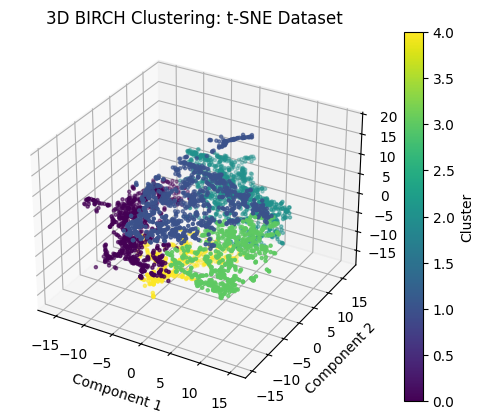

Number of clusters:  5
Silhouette Score: 0.3086328893045906
Davies-Bouldin Index: 1.0951473524709843
Calinski-Harabasz Score: 1543.8524007298165


In [61]:
# Clustering the dataset
tsne_tuned_cluster_labels = birch_clustering(df_tsne, threshold=0.9, branching_factor=50, n_clusters=5)

# Visualising the clusters
visualise_clusters(df_tsne, 't-SNE Dataset', tsne_tuned_cluster_labels)

# Printing number of clusters
print('Number of clusters: ', len(np.unique(tsne_tuned_cluster_labels)))

# Calculating the Silhouette Score, Davies-Bouldin Index, and Calinski-Harabasz Score
silhouette_tsne_tuned = silhouette_score(df_tsne, tsne_tuned_cluster_labels)
db_tsne_tuned = davies_bouldin_score(df_tsne, tsne_tuned_cluster_labels)
ch_tsne_tuned = calinski_harabasz_score(df_tsne, tsne_tuned_cluster_labels)

# Printing the scores
print('Silhouette Score:', silhouette_tsne_tuned)
print('Davies-Bouldin Index:', db_tsne_tuned)
print('Calinski-Harabasz Score:', ch_tsne_tuned)

## 4.4 UMAP Dataset

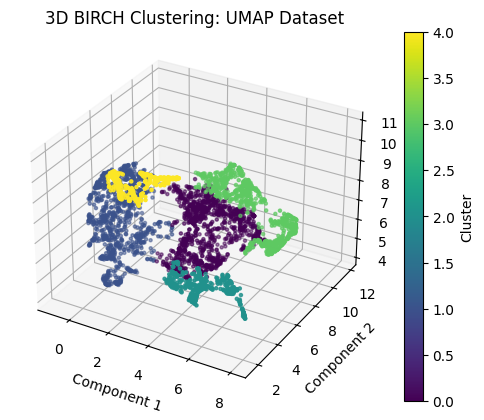

Number of clusters:  5
Silhouette Score: 0.41314991312846766
Davies-Bouldin Index: 0.9357427561222093
Calinski-Harabasz Score: 2479.9438174827387


In [62]:
# Clustering the dataset
umap_tuned_cluster_labels = birch_clustering(df_umap, threshold=0.9, branching_factor=50, n_clusters=5)

# Visualising the clusters
visualise_clusters(df_umap, 'UMAP Dataset', umap_tuned_cluster_labels)

# Printing number of clusters
print('Number of clusters: ', len(np.unique(umap_tuned_cluster_labels)))

# Calculating the Silhouette Score, Davies-Bouldin Index, and Calinski-Harabasz Score
silhouette_umap_tuned = silhouette_score(df_umap, umap_tuned_cluster_labels)
db_umap_tuned = davies_bouldin_score(df_umap, umap_tuned_cluster_labels)
ch_umap_tuned = calinski_harabasz_score(df_umap, umap_tuned_cluster_labels)

# Printing the scores
print('Silhouette Score:', silhouette_umap_tuned)
print('Davies-Bouldin Index:', db_umap_tuned)
print('Calinski-Harabasz Score:', ch_umap_tuned)

__Final Conclusion__:
This setting is well suited for UMAP dataset, but not for the other datasets.